#### Necessary imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.signal import savgol_filter

In [2]:
df = pd.read_csv('./sourcedata/Data.csv', index_col='Zeit')
df.index.name = None
df.head()

,GranetalsperreMin15Niederschlag,HahnenkleeMin15Niederschlag,MargarethenklippeMin15W,MargarethenklippeMin15Q,SennhuetteMin15W,SennhuetteMin15Q,Niederschlag_Gosequelle,Niederschlag_Abzuchtquelle,Pegel_Rammelsberghaus_Q,Pegel_Rammelsberghaus_W,Sensor_Sum,Value,Image_Sum
11/1/2003 0:00,0.0,0.0,6.9,0.033,4.6,0.034,0.0,0.0,0.082,10,0.0,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.0
11/1/2003 0:15,0.0,0.0,7.3,0.038,4.4,0.032,0.0,0.0,0.076,10,0.0,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.0
11/1/2003 0:30,0.0,0.0,7.3,0.038,4.3,0.031,0.0,0.0,0.074,10,0.0,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.0
11/1/2003 0:45,0.0,0.0,7.2,0.037,4.4,0.032,0.0,0.0,0.076,10,0.0,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.0
11/1/2003 1:00,0.0,0.0,7.2,0.037,4.5,0.033,0.0,0.0,0.079,10,0.0,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.0


#### Visualising the timeseries

In [3]:
x = df['Image_Sum']
y = df['SennhuetteMin15W']
yfilter = pd.Series(savgol_filter(y, 49, 2))
yfilter.index = y.index

#### Change in water levels every 2 hours

In [4]:
n_future = 8
lags = 15
order = 96
ydelta = yfilter.diff(n_future)
print("Correlation: rainfall and S.W: ", x.corr(y))
print("\nCorrelation: rainfall and filtered S.W: ", x.corr(yfilter))
print("\nCorrelation: rainfall and Δ S.W: ", x.corr(ydelta))

Correlation: rainfall and S.W:  0.07525113763194247

Correlation: rainfall and filtered S.W:  0.08351812772901089

Correlation: rainfall and Δ S.W:  0.3141369381452148


In [5]:
ydelta = yfilter - yfilter.shift(n_future) #ydelta = yfilter.diff(n_future)
data = pd.DataFrame([x, yfilter, ydelta]).transpose()
data.columns = ['rainfall', 'S.W', 'Δ S.W']
#train, test = train_test_split(data, test_size=0.1, random_state=42, shuffle=False)
data[n_future:n_future+20]

,rainfall,S.W,Δ S.W
11/1/2003 2:00,0.0,4.395712,-0.031207
11/1/2003 2:15,0.0,4.393720,-0.027814
11/1/2003 2:30,0.0,4.392152,-0.024421
11/1/2003 2:45,0.0,4.391008,-0.021028
11/1/2003 3:00,0.0,4.390288,-0.017635
11/1/2003 3:15,0.0,4.389992,-0.014242
11/1/2003 3:30,0.0,4.390120,-0.010849
11/1/2003 3:45,0.0,4.390673,-0.007456
11/1/2003 4:00,0.0,4.391649,-0.004063
11/1/2003 4:15,0.0,4.393050,-0.000670


In [6]:
# how to forecast for next 2 hours
# if we add the 0th value of S.W to 8th value of Δ S.W, then we reach the 8th value of S.W
# eg: 
eg = data['S.W'].iloc[0] + data['Δ S.W'].iloc[n_future]
print(eg, eg == data['S.W'].iloc[n_future])

4.395712293428012 True


#### Cross correlation

In [7]:
for i in range(n_future, order): 
    data[f'rainfall_t-{i}'] = data['rainfall'].shift(i)

for i in range(n_future, lags): 
    data[f'Δ S.W_t-{i}'] = data['Δ S.W'].shift(i)

data = data[order:] # slicing and removing first 96 records
#data = data[data['Δ S.W'] > 0.001] # filtering: if Δ S.W is very low, it is not significant
data[0:20]

,rainfall,S.W,Δ S.W,rainfall_t-8,rainfall_t-9,rainfall_t-10,rainfall_t-11,rainfall_t-12,rainfall_t-13,rainfall_t-14,...,rainfall_t-93,rainfall_t-94,rainfall_t-95,Δ S.W_t-8,Δ S.W_t-9,Δ S.W_t-10,Δ S.W_t-11,Δ S.W_t-12,Δ S.W_t-13,Δ S.W_t-14
11/2/2003 0:00,0.0,4.576343,-0.009356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.017394,0.011065,0.013070,0.007726,0.008531,0.021632,0.015139
11/2/2003 0:15,4.3,4.574192,-0.010574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.014942,0.017394,0.011065,0.013070,0.007726,0.008531,0.021632
11/2/2003 0:30,0.2,4.575582,-0.003139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.004334,0.014942,0.017394,0.011065,0.013070,0.007726,0.008531
11/2/2003 0:45,0.2,4.579860,0.003441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.001177,0.004334,0.014942,0.017394,0.011065,0.013070,0.007726
11/2/2003 1:00,0.0,4.578118,0.003042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.002684,0.001177,0.004334,0.014942,0.017394,0.011065,0.013070
11/2/2003 1:15,0.3,4.579840,0.005175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.002082,0.002684,0.001177,0.004334,0.014942,0.017394,0.011065
11/2/2003 1:30,6.4,4.579477,0.001556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.000656,0.002082,0.002684,0.001177,0.004334,0.014942,0.017394
11/2/2003 1:45,0.2,4.580366,0.001668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.002194,-0.000656,0.002082,0.002684,0.001177,0.004334,0.014942
11/2/2003 2:00,0.0,4.581829,0.005486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.009356,-0.002194,-0.000656,0.002082,0.002684,0.001177,0.004334
11/2/2003 2:15,0.0,4.580430,0.006237,4.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.010574,-0.009356,-0.002194,-0.000656,0.002082,0.002684,0.001177


In [8]:
data['S.W'][:20]

11/2/2003 0:00    4.576343
11/2/2003 0:15    4.574192
11/2/2003 0:30    4.575582
11/2/2003 0:45    4.579860
11/2/2003 1:00    4.578118
11/2/2003 1:15    4.579840
11/2/2003 1:30    4.579477
11/2/2003 1:45    4.580366
11/2/2003 2:00    4.581829
11/2/2003 2:15    4.580430
11/2/2003 2:30    4.582864
11/2/2003 2:45    4.579546
11/2/2003 3:00    4.585431
11/2/2003 3:15    4.594345
11/2/2003 3:30    4.591857
11/2/2003 3:45    4.590787
11/2/2003 4:00    4.591032
11/2/2003 4:15    4.598639
11/2/2003 4:30    4.600633
11/2/2003 4:45    4.604314
Name: S.W, dtype: float64

In [9]:
data['S.W'].shift(n_future)[:20]

11/2/2003 0:00         NaN
11/2/2003 0:15         NaN
11/2/2003 0:30         NaN
11/2/2003 0:45         NaN
11/2/2003 1:00         NaN
11/2/2003 1:15         NaN
11/2/2003 1:30         NaN
11/2/2003 1:45         NaN
11/2/2003 2:00    4.576343
11/2/2003 2:15    4.574192
11/2/2003 2:30    4.575582
11/2/2003 2:45    4.579860
11/2/2003 3:00    4.578118
11/2/2003 3:15    4.579840
11/2/2003 3:30    4.579477
11/2/2003 3:45    4.580366
11/2/2003 4:00    4.581829
11/2/2003 4:15    4.580430
11/2/2003 4:30    4.582864
11/2/2003 4:45    4.579546
Name: S.W, dtype: float64

In [10]:
(data['S.W'] - data['S.W'].shift(n_future))[:22]

11/2/2003 0:00         NaN
11/2/2003 0:15         NaN
11/2/2003 0:30         NaN
11/2/2003 0:45         NaN
11/2/2003 1:00         NaN
11/2/2003 1:15         NaN
11/2/2003 1:30         NaN
11/2/2003 1:45         NaN
11/2/2003 2:00    0.005486
11/2/2003 2:15    0.006237
11/2/2003 2:30    0.007282
11/2/2003 2:45   -0.000314
11/2/2003 3:00    0.007313
11/2/2003 3:15    0.014505
11/2/2003 3:30    0.012380
11/2/2003 3:45    0.010421
11/2/2003 4:00    0.009203
11/2/2003 4:15    0.018209
11/2/2003 4:30    0.017770
11/2/2003 4:45    0.024768
11/2/2003 5:00    0.037069
11/2/2003 5:15    0.035003
Name: S.W, dtype: float64

In [11]:
data[:22]

,rainfall,S.W,Δ S.W,rainfall_t-8,rainfall_t-9,rainfall_t-10,rainfall_t-11,rainfall_t-12,rainfall_t-13,rainfall_t-14,...,rainfall_t-93,rainfall_t-94,rainfall_t-95,Δ S.W_t-8,Δ S.W_t-9,Δ S.W_t-10,Δ S.W_t-11,Δ S.W_t-12,Δ S.W_t-13,Δ S.W_t-14
11/2/2003 0:00,0.0,4.576343,-0.009356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.017394,0.011065,0.013070,0.007726,0.008531,0.021632,0.015139
11/2/2003 0:15,4.3,4.574192,-0.010574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.014942,0.017394,0.011065,0.013070,0.007726,0.008531,0.021632
11/2/2003 0:30,0.2,4.575582,-0.003139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.004334,0.014942,0.017394,0.011065,0.013070,0.007726,0.008531
11/2/2003 0:45,0.2,4.579860,0.003441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.001177,0.004334,0.014942,0.017394,0.011065,0.013070,0.007726
11/2/2003 1:00,0.0,4.578118,0.003042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.002684,0.001177,0.004334,0.014942,0.017394,0.011065,0.013070
11/2/2003 1:15,0.3,4.579840,0.005175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.002082,0.002684,0.001177,0.004334,0.014942,0.017394,0.011065
11/2/2003 1:30,6.4,4.579477,0.001556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.000656,0.002082,0.002684,0.001177,0.004334,0.014942,0.017394
11/2/2003 1:45,0.2,4.580366,0.001668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.002194,-0.000656,0.002082,0.002684,0.001177,0.004334,0.014942
11/2/2003 2:00,0.0,4.581829,0.005486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.009356,-0.002194,-0.000656,0.002082,0.002684,0.001177,0.004334
11/2/2003 2:15,0.0,4.580430,0.006237,4.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.010574,-0.009356,-0.002194,-0.000656,0.002082,0.002684,0.001177


The above dataset now contains the difference with the lagged rainfall values, as well as the lagged change in water levels.

### BASELINE MODEL

#### Split dataset

In [12]:
exog = data.loc[:, f'rainfall_t-{n_future}': f'rainfall_t-{order-1}'] # X
endog = data['Δ S.W'] # Δy

n_train = int(len(data)*0.9)
train_x = exog[0:n_train]
test_x = exog[n_train:]

train_y = endog[0:n_train]
test_y = endog[n_train:]

train_SW = data['S.W'][0:n_train]
test_SW = data['S.W'][n_train:]

#train_x, test_x, train_y, test_y = split(exog, endog)
#train_SW, test_SW = train_test_split(data['S.W'], test_size=0.1, random_state=42, shuffle=False)

#### Linear regression (Baseline)

In [13]:
def plot_coeff(model, title="Coefficients of Linear regression"):
    print("Intercept: ", model.intercept_)
    print("\nCoefficients: ", )
    plt.title(title)
    plt.xlabel('# coefficients')
    plt.ylabel('coefficients')
    plt.plot(model.coef_);

Intercept:  -0.038281592274311056

Coefficients: 


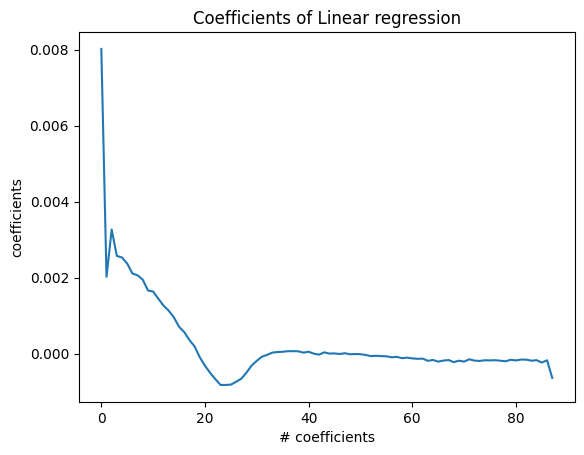

In [14]:
baselinemodel = LinearRegression().fit(train_x, train_y) # fit using train data
ypred = baselinemodel.predict(test_x) # evaluate using test data
plot_coeff(baselinemodel)

In [15]:
def predictions_framework(ypred, ytrue): 
    predictions = pd.DataFrame([])
    predictions.index = ytrue.index
    predictions['ypred'] = ypred
    predictions['ytrue'] = ytrue
    #predictions['Sennhuette15W'] = test_SW
    return predictions

def plot_baseline(predictions, title='Baseline test predictions'):
    plt.plot(predictions['ytrue'][18750:18850], label='actual')
    plt.plot(predictions['ypred'][18750:18850], label='predicted')
    #plt.plot(predictions['Sennhuette15W'], label='Sennhuette15W')
    plt.title(title)
    plt.ylabel('Δ S.W')
    plt.legend(loc='upper right')
    #plt.xticks(rotation=50)
    plt.xticks('off')
    plt.show()

In [16]:
prediction = predictions_framework(ypred, test_y)
""" plt.plot(test_y, label='actual')
plt.plot(prediction['ypred'], label='pred')
plt.title('Baseline test predictions')
plt.xticks(rotation=45)
plt.legend(); """

" plt.plot(test_y, label='actual')\nplt.plot(prediction['ypred'], label='pred')\nplt.title('Baseline test predictions')\nplt.xticks(rotation=45)\nplt.legend(); "

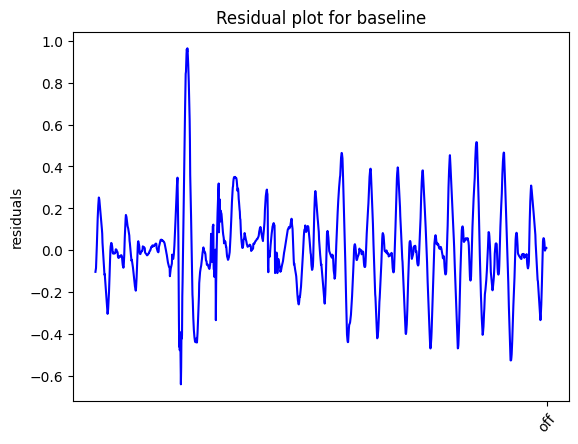

In [17]:
res = prediction['ytrue'] -prediction['ypred']
plt.title('Residual plot for baseline')
plt.xticks(rotation=50)
plt.ylabel('residuals')
plt.plot(res[6000:7600], color='b')
plt.xticks('off');

In [18]:
print(f"Linear Regression-Training set score: {baselinemodel.score(train_x, train_y.values.reshape(-1,1)):.6f}")
print(f"Linear Regression-Test set score: {baselinemodel.score(test_x, test_y.values.reshape(-1,1)):.6f}")

Linear Regression-Training set score: 0.287095
Linear Regression-Test set score: 0.158529


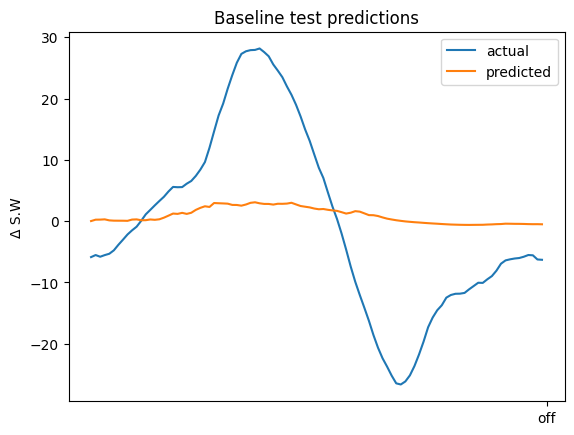

In [19]:
plot_baseline(prediction)

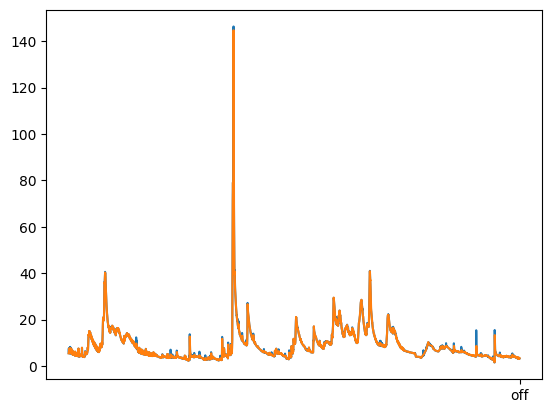

In [20]:
plt.plot((ypred[n_future:] + test_SW[:-n_future]))
plt.plot(test_SW);
plt.xticks('off');

#### Test groundtruth

In [21]:
test_SW[:10], test_SW.shift(-lags)[:10]

(1/11/2017 12:00    5.411098
 1/11/2017 12:15    5.443414
 1/11/2017 12:30    5.483696
 1/11/2017 12:45    5.535613
 1/11/2017 13:00    5.589285
 1/11/2017 13:15    5.609170
 1/11/2017 13:30    5.627647
 1/11/2017 13:45    5.647324
 1/11/2017 14:00    5.665288
 1/11/2017 14:15    5.684746
 Name: S.W, dtype: float64,
 1/11/2017 12:00    5.822860
 1/11/2017 12:15    5.847771
 1/11/2017 12:30    5.872747
 1/11/2017 12:45    5.897607
 1/11/2017 13:00    5.922173
 1/11/2017 13:15    5.946267
 1/11/2017 13:30    5.969710
 1/11/2017 13:45    5.992322
 1/11/2017 14:00    6.013926
 1/11/2017 14:15    6.042625
 Name: S.W, dtype: float64)

In [22]:
test_y[:10], test_y.shift(-lags)[:10]

(1/11/2017 12:00   -0.086412
 1/11/2017 12:15   -0.015062
 1/11/2017 12:30    0.056655
 1/11/2017 12:45    0.132076
 1/11/2017 13:00    0.203750
 1/11/2017 13:15    0.232441
 1/11/2017 13:30    0.246837
 1/11/2017 13:45    0.258121
 1/11/2017 14:00    0.254190
 1/11/2017 14:15    0.241332
 Name: Δ S.W, dtype: float64,
 1/11/2017 12:00    0.175536
 1/11/2017 12:15    0.182483
 1/11/2017 12:30    0.188000
 1/11/2017 12:45    0.192087
 1/11/2017 13:00    0.194743
 1/11/2017 13:15    0.195969
 1/11/2017 13:30    0.195765
 1/11/2017 13:45    0.194130
 1/11/2017 14:00    0.191065
 1/11/2017 14:15    0.194853
 Name: Δ S.W, dtype: float64)

In [23]:
(test_y.shift(-lags) + test_SW)[:10]

1/11/2017 12:00    5.586634
1/11/2017 12:15    5.625897
1/11/2017 12:30    5.671697
1/11/2017 12:45    5.727700
1/11/2017 13:00    5.784029
1/11/2017 13:15    5.805139
1/11/2017 13:30    5.823412
1/11/2017 13:45    5.841455
1/11/2017 14:00    5.856354
1/11/2017 14:15    5.879599
dtype: float64

In [24]:
test_SW.shift(-lags)[:10]

1/11/2017 12:00    5.822860
1/11/2017 12:15    5.847771
1/11/2017 12:30    5.872747
1/11/2017 12:45    5.897607
1/11/2017 13:00    5.922173
1/11/2017 13:15    5.946267
1/11/2017 13:30    5.969710
1/11/2017 13:45    5.992322
1/11/2017 14:00    6.013926
1/11/2017 14:15    6.042625
Name: S.W, dtype: float64

In [25]:
(test_y.shift(-n_future) + test_SW)[:10]

1/11/2017 12:00    5.665288
1/11/2017 12:15    5.684746
1/11/2017 12:30    5.705520
1/11/2017 12:45    5.727430
1/11/2017 13:00    5.750298
1/11/2017 13:15    5.773944
1/11/2017 13:30    5.798192
1/11/2017 13:45    5.822860
1/11/2017 14:00    5.847771
1/11/2017 14:15    5.872747
dtype: float64

In [26]:
test_SW.shift(-n_future)[:10]

1/11/2017 12:00    5.665288
1/11/2017 12:15    5.684746
1/11/2017 12:30    5.705520
1/11/2017 12:45    5.727430
1/11/2017 13:00    5.750298
1/11/2017 13:15    5.773944
1/11/2017 13:30    5.798192
1/11/2017 13:45    5.822860
1/11/2017 14:00    5.847771
1/11/2017 14:15    5.872747
Name: S.W, dtype: float64

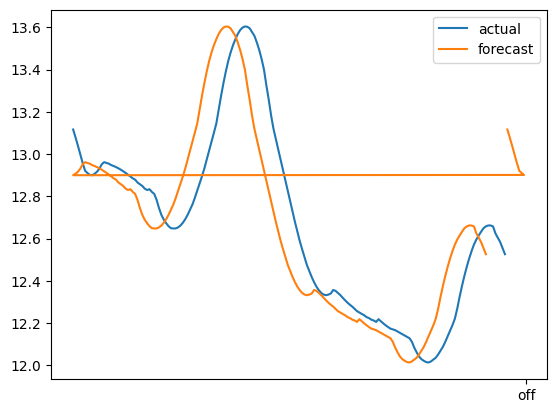

In [27]:
ground_truth = test_y.shift(-n_future) + test_SW
plt.plot(test_SW[6800+n_future:6990], label='actual')
plt.plot(ground_truth[6800:6990-n_future], label='forecast')
#plt.plot(predicted_values[6000:7600], label='predicted')
plt.xticks('off')
plt.legend()
plt.show()

In [28]:
ground_truth[:20], test_SW[:20]

(1/11/2017 12:00    5.665288
 1/11/2017 12:15    5.684746
 1/11/2017 12:30    5.705520
 1/11/2017 12:45    5.727430
 1/11/2017 13:00    5.750298
 1/11/2017 13:15    5.773944
 1/11/2017 13:30    5.798192
 1/11/2017 13:45    5.822860
 1/11/2017 14:00    5.847771
 1/11/2017 14:15    5.872747
 1/11/2017 14:30    5.897607
 1/11/2017 14:45    5.922173
 1/11/2017 15:00    5.946267
 1/11/2017 15:15    5.969710
 1/11/2017 15:30    5.992322
 1/11/2017 15:45    6.013926
 1/11/2017 16:00    6.042625
 1/11/2017 16:15    6.062634
 1/11/2017 16:30    6.080575
 1/11/2017 16:45    6.096294
 dtype: float64,
 1/11/2017 12:00    5.411098
 1/11/2017 12:15    5.443414
 1/11/2017 12:30    5.483696
 1/11/2017 12:45    5.535613
 1/11/2017 13:00    5.589285
 1/11/2017 13:15    5.609170
 1/11/2017 13:30    5.627647
 1/11/2017 13:45    5.647324
 1/11/2017 14:00    5.665288
 1/11/2017 14:15    5.684746
 1/11/2017 14:30    5.705520
 1/11/2017 14:45    5.727430
 1/11/2017 15:00    5.750298
 1/11/2017 15:15    5.7739

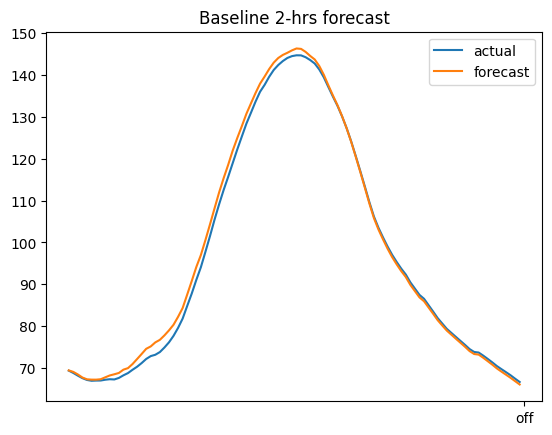

In [29]:
forecast = prediction['ypred'].shift(-n_future) + test_SW
plt.plot(test_SW[18750:18850], label='actual')
plt.plot(forecast[18750:18850], label='forecast')
plt.title("Baseline 2-hrs forecast")
plt.xticks('off')
plt.legend()
plt.show()

In [30]:
test_SW

1/11/2017 12:00    5.411098
1/11/2017 12:15    5.443414
1/11/2017 12:30    5.483696
1/11/2017 12:45    5.535613
1/11/2017 13:00    5.589285
                     ...   
6/30/2018 22:45    3.219091
6/30/2018 23:00    3.236170
6/30/2018 23:15    3.254341
6/30/2018 23:30    3.273606
6/30/2018 23:45    3.293964
Name: S.W, Length: 51408, dtype: float64

In [31]:
forecast

1/11/2017 12:00    5.550408
1/11/2017 12:15    5.637713
1/11/2017 12:30    5.591597
1/11/2017 12:45    5.683155
1/11/2017 13:00    5.826956
                     ...   
6/30/2018 22:45         NaN
6/30/2018 23:00         NaN
6/30/2018 23:15         NaN
6/30/2018 23:30         NaN
6/30/2018 23:45         NaN
Length: 51408, dtype: float64

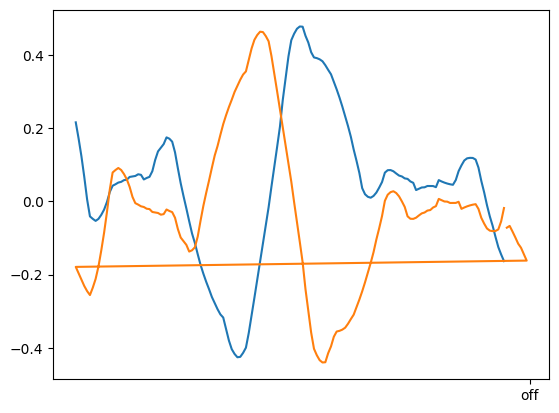

In [32]:
plt.plot((test_SW - ground_truth)[6808:6960]);
plt.plot((test_y - ypred)[6800:6960]);
plt.xticks('off');

#### With autoregressive part of y

In [33]:
exog_AR = data.loc[:, f'rainfall_t-{n_future}': f'Δ S.W_t-{lags-1}'] # including the autocorrelation context
#train_x, test_x, train_y, test_y= split(exog, endog)
train_x_AR = exog_AR[0:n_train]
test_x_AR = exog_AR[n_train:]

train_y_AR = endog[0:n_train]
test_y_AR = endog[n_train:]

train_SW_AR = data['S.W'][0:n_train]
test_SW_AR = data['S.W'][n_train:]

In [34]:
train_x_AR

,rainfall_t-8,rainfall_t-9,rainfall_t-10,rainfall_t-11,rainfall_t-12,rainfall_t-13,rainfall_t-14,rainfall_t-15,rainfall_t-16,rainfall_t-17,...,rainfall_t-93,rainfall_t-94,rainfall_t-95,Δ S.W_t-8,Δ S.W_t-9,Δ S.W_t-10,Δ S.W_t-11,Δ S.W_t-12,Δ S.W_t-13,Δ S.W_t-14
11/2/2003 0:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.017394,0.011065,0.013070,0.007726,0.008531,0.021632,0.015139
11/2/2003 0:15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.014942,0.017394,0.011065,0.013070,0.007726,0.008531,0.021632
11/2/2003 0:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.004334,0.014942,0.017394,0.011065,0.013070,0.007726,0.008531
11/2/2003 0:45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.001177,0.004334,0.014942,0.017394,0.011065,0.013070,0.007726
11/2/2003 1:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.002684,0.001177,0.004334,0.014942,0.017394,0.011065,0.013070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1/11/2017 10:45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.738523,-0.717706,-0.654599,-0.571091,-0.509990,-0.450921,-0.391099
1/11/2017 11:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.735754,-0.738523,-0.717706,-0.654599,-0.571091,-0.509990,-0.450921
1/11/2017 11:15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.717325,-0.735754,-0.738523,-0.717706,-0.654599,-0.571091,-0.509990
1/11/2017 11:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.686240,-0.717325,-0.735754,-0.738523,-0.717706,-0.654599,-0.571091


Intercept:  -0.002148581352923392

Coefficients: 


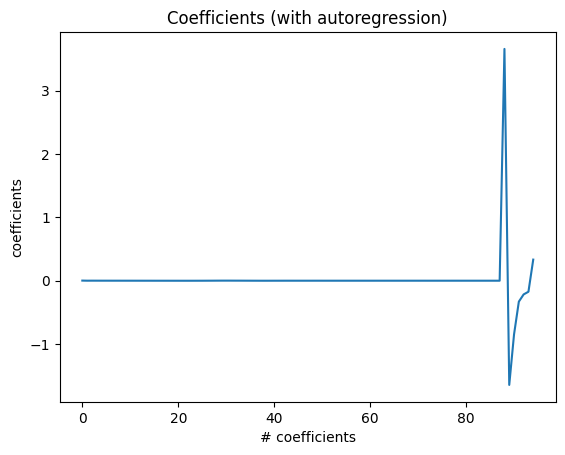

In [35]:
baselinemodel_AR = LinearRegression().fit(train_x_AR, train_y_AR) # fit using train data
ypred_AR = baselinemodel_AR.predict(test_x_AR) # evaluate using test data
plot_coeff(baselinemodel_AR, "Coefficients (with autoregression)")

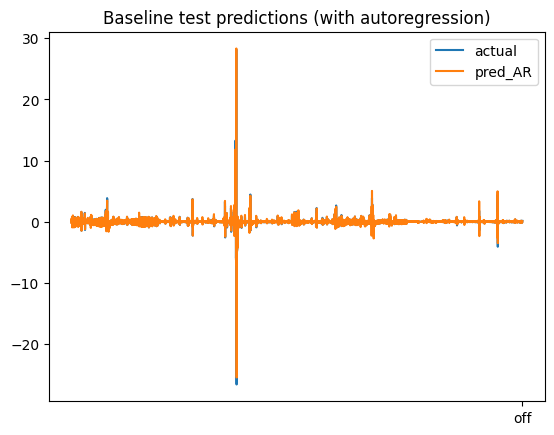

In [36]:
prediction_AR = predictions_framework(ypred_AR, test_y_AR)
plt.plot(test_y_AR, label='actual')
plt.plot(prediction_AR['ypred'], label='pred_AR')
plt.title('Baseline test predictions (with autoregression)')
plt.xticks('off')
plt.legend();

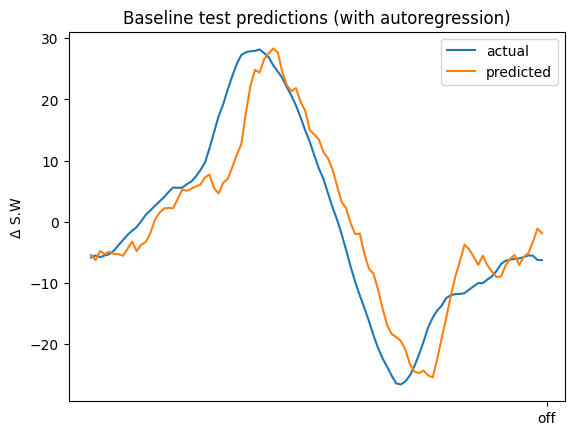

In [37]:
plot_baseline(prediction_AR, 'Baseline test predictions (with autoregression)')

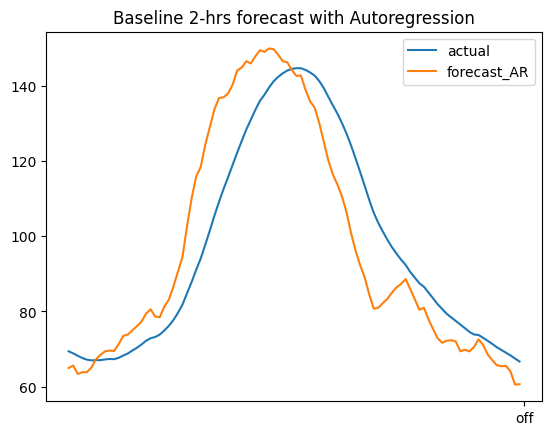

In [38]:
forecast_AR = prediction_AR['ypred'].shift(-n_future) + test_SW_AR
plt.plot(test_SW_AR[18750:18850], label='actual')
plt.plot(forecast_AR[18750:18850], label='forecast_AR')
plt.title("Baseline 2-hrs forecast with Autoregression")
plt.xticks('off')
plt.legend()
plt.show()

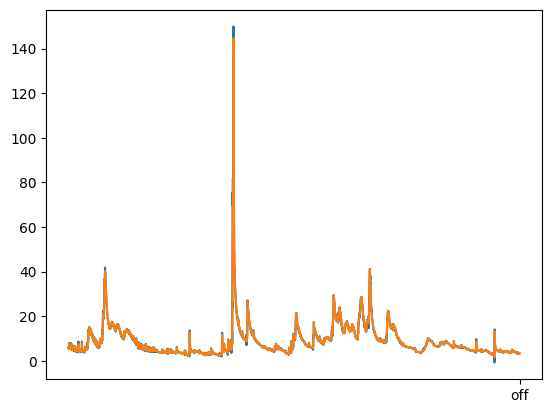

In [39]:
plt.plot(ypred_AR[n_future:] + test_SW_AR[:-n_future])
plt.plot(test_SW_AR);
plt.xticks('off');

#### Accuracy Evaluation

In [40]:
def forecast_accuracy(model, forecast, actual):
    metrics = pd.DataFrame(columns=['model', 'MSE', 'RMSE', 'MAE', 'corr'])
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mse = np.mean((forecast - actual)**2)       #MSE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    metrics = metrics._append({'model': model, 'MSE':mse, 'RMSE':rmse, 'MAE': mae, 'corr':corr}, ignore_index = True)

    return metrics

#### Plot Baseline

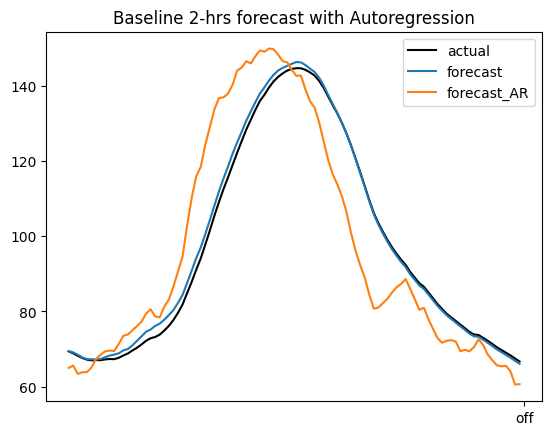

In [41]:
plt.plot(test_SW_AR[18750:18850], color='black', label='actual')
plt.plot(forecast[18750:18850], label='forecast')
plt.plot(forecast_AR[18750:18850], label='forecast_AR')
plt.title("Baseline 2-hrs forecast with Autoregression")
plt.xticks('off')
plt.legend()
plt.show()